<h1><center>Data science for Geographers</center></h1>

<h2><center>Practical 2 - Plotting, visualisation and multiple regression in R</center></h2>

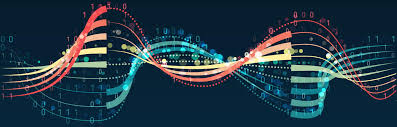

## Contents<a class="anchor" id="contents"></a>

- 1. [Introduction](#section1)
    - [Reminder: What are we trying to do?](#section1.1)
    - [Exercise](#exercise1)
- 2. [Summarising and visualising](#section2)
    - [Summary statistics and tables](#section2.1)
    - [Plots (boxplots and histograms)](#section2.2)
    - [An aside about plotting](#section2.3)
    - [Saving plots for presentations or publication](#section2.4)
    - [Creating 'Table 1'](#section2.5)
    - [Exercise](#exercise2)
- 3. [Linear Regression in R](#section3)
    - [Simple Linear Regression](#section3.1)
    - [Multiple Linear Regression](#section3.2)
    - [Exercise](#exercise3)
- 4. [Independent analysis exercises](#section4)
- 5. [Some tips on good Coding Practice](#section5)

## 1. Introduction<a class="anchor" id="section1"></a>

### Reminder: What are we trying to do?<a class="anchor" id="section1.1"></a>

If you remember from the previous practical, we are going through all of the steps for a research project using secondary quantitative data. In our particular example, we are undertaking a research project where we are interested in the geography of the availabillity of tobbaco products (i.e. similar to the paper below):

https://tobaccocontrol.bmj.com/content/tobaccocontrol/25/1/75.full.pdf

Last week, we went through the process of cleaning, recoding and merging the datasets together so that by the end we had a dataset ready to answer our research questions. This final dataset consists of an area-level dataset (as opposed to individual level data for example). Our unit of analysis is datazones and for each datazone we have information on the level of deprivation (in terms of employment levels, health, education and income), the numbers of tobacco retailers per unit of population, smoking rates among pregnant women and whether the area is urban or rural. Since there are approximately 6500 datazones in Scotland we now have a dataset which looks like this, with approximately 6500 rows of data:

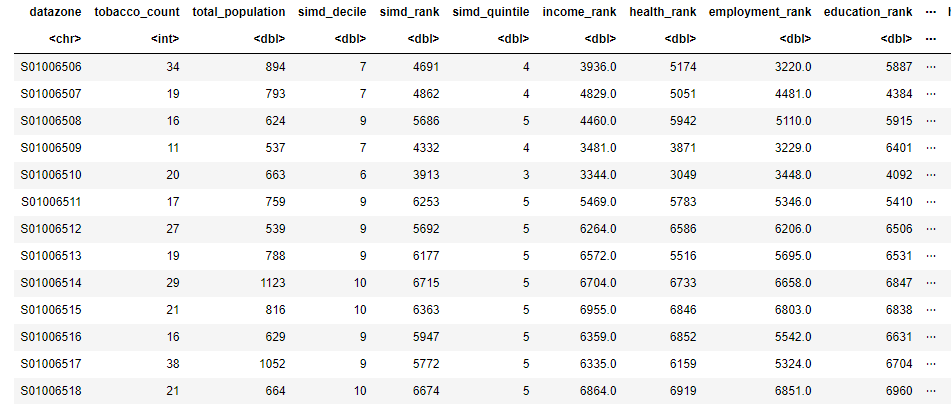

So, we have got the boring part out of the way! Now it's on to the interesting part, the actual analysis of this data! Let's first etablish the three research questions we are going to try and answer today. What we are going to do today is showcase how we might approach answering questions like these:

1. Is the number of tobacco retailers in urban areas associated with smoking rates in datazones in Scotland?
2. Is this association independent of the level of deprivation in these datazones?
3. Is the level of deprivation in urban datazones associated with the number of tobacco retailers?

First thing we have to do, as always, is load in the packages we need. As last week everything we need is in the tidyverse collection of packages. So, let's import that now... 

In [ ]:
#First let's load in the packages we need - we will need skimr and viridis later in the practical
library(tidyverse)

This week we are also going to be using some additional packages, beyond those contained in the tidyverse. Let's start with the package `knitr` which is useful for creating tables of descriptive statistics...

In [ ]:
library(knitr) #for descriptive tables

We are also going to need some packages that haven't been installed by default. We can install packages using the `install.packages()` command. The first package we are going to install is `skimr` which is helpful for producing summary plots. Note this command will take some time to complete so be patient!

In [ ]:
install.packages("skimr") #for nice summary plots
library(skimr)

It's also now becoming more commonplace to produce plots and graphs in colours that are colourblind-friendly. R makes this easy for us with the package `viridis`. Let's install that now...

In [ ]:
install.packages("viridis") #for colourblind-friendly palette
library(viridis)

Lastly, There is a package that makes it easy to produce one of the most common tables that you will need. This is called the `table1` package.

In [ ]:
install.packages("table1")
library(table1) #for nice 'Table 1' for papers

With all of our packages installed, now let's read the data we created in last weeks practical...

In [ ]:
analysis_data <- read_csv("merged_data.csv")

And take a look at the data to remind ourselves what is there...

In [ ]:
head(analysis_data)

### Exercise <a class="anchor" id="exercise1"></a>

To refresh our memories from last week, lets do one more variable recode to see what you can remember:

1. Create new variables called `health_quintile` and `retailers_adj_quintile`. These should be based on the existing `health_rank` and `retailers_adj` variables but dividing them into five equal groups.

2. Change these two new variables so that they are factor variables. Label the `health_quintile` the same as the other "quintile" variables i.e. "Most deprived", "Second, "Third", "Fourth" and "Least deprived". Label the `retailer_adj` as you see fit. 

3. Change the variables `simd_quintile` and `simd_decile` into factors and relabel appropriately (you'll need to think of labels for the `simd_decile` variable.

Bonus points if you can figure out how to do tasks 1 and 2 in one command using the `%>%` command!

<b>Hint: you can use `mutate` and the `ntile` command here as well as `fct_recode` . Refer back to last weeks notebook if you get stuck!

In [ ]:
#1
analysis_data <- analysis_data %>%
    mutate(health_quintile = ntile(health_rank, 5))

analysis_data <- analysis_data %>%
    mutate(retailers_adj_quintile = ntile(retailers_adj, 5))

#2 
analysis_data <- analysis_data %>%
    mutate(retailers_adj_quintile = as.factor(retailers_adj_quintile) %>%
    fct_recode("Lowest availabillity" = "1", 
               "Second" = "2", 
               "Third" = "3", 
               "Fourth " = "4", 
               "Highest availabillity" = "5"))

analysis_data <- analysis_data %>%
    mutate(health_quintile = as.factor(health_quintile) %>%
    fct_recode("Most deprived" = "1", 
               "Second" = "2", 
               "Third" = "3", 
               "Fourth " = "4", 
               "Least deprived" = "5"))

# #bonus solution!
# analysis_data <- analysis_data %>%
#     mutate(health_quintile = ntile(health_rank, 5)) %>%
#     mutate(health_quintile = as.factor(health_quintile) %>%
#       fct_recode("Most deprived" = "1", 
#                  "Second" = "2", 
#                  "Third" = "3", 
#                  "Fourth " = "4", 
#                  "Least deprived" = "5")) %>%
#     mutate(retailers_adj_quintile = ntile(retailers_adj, 5)) %>%
#     mutate(retailers_adj_quintile = as.factor(retailers_adj_quintile) %>%
#       fct_recode("Lowest availabillity" = "1", 
#                  "Second" = "2", 
#                  "Third" = "3", 
#                  "Fourth " = "4", 
#                  "Highest availabillity" = "5"))

#3
analysis_data <- analysis_data %>%
    mutate(simd_quintile = as.factor(simd_quintile) %>%
      fct_recode("Most deprived" = "1", 
                 "Second" = "2", 
                 "Third" = "3", 
                 "Fourth " = "4", 
                 "Least deprived" = "5")) %>%
    mutate(simd_decile = as.factor(simd_decile) %>%
      fct_recode("Most deprived" = "1",
                 "Second" = "2", 
                 "Third" = "3", 
                 "Fourth " = "4",
                 "Fifth" = "5",
                 "Sixth" = "6",
                 "Seventh" = "7",
                 "Eighth" = "8",
                 "Ninth" = "9",
                 "Least deprived" = "10"))
      


[Back to contents](#section1)

## 2. Summarising and visualising<a class="anchor" id="section2"></a>

### Summary statistics and tables<a class="anchor" id="section2.1"></a>

Before we get stuck into the modelling for our research questions, let's draw up some plots and descriptives of our data. You should have some familliarity with these commands from "Key Methods".


First let's look at some of our categorical variables using `count`.

In [ ]:
#Tables for the categorical variables
analysis_data %>% 
  count(urban_rural)

analysis_data %>% 
  count(simd_quintile)

analysis_data %>% 
  count(simd_decile)

analysis_data %>% 
  count(simd_quintile)

Now let's look at some of the continuous variables using `summary()`...

Remember when looking at the below code that using the `$` is a method for selecting a particular variable from a dataset...

In [ ]:
#Summaries for continuous variables
summary(analysis_data$simd_rank)
summary(analysis_data$total_population)

Note that you can also look at all variables together by just using the `summary()` command with just the data object. Like...

In [ ]:
summary(analysis_data)

You might be wondering why R doesnt try and do summaries for all of the variables? Well, because we have told R which of our variables are factors and which are numerical (continuous) R knows which variables to include in the summary command i.e. only the numerical ones.

If you would like a summary of all of the variables in the dataset you can use `skim` from the `skimr` package which we installed earlier.

In [ ]:
analysis_data %>% 
    skimr::skim()

It is worth taking some time looking at the output of `skimr` as it contains some useful information. Note that each row is a variable and the columns contain some summary information about the variables.

### Plots (boxplots and histograms)<a class="anchor" id="section2.2"></a>

It is also good practice to look at our data using graphs and plots, particularly boxplots and histograms.

Let's look at the `retailers_adj` variable.

The various lines of code below offer lots of options for creating different histograms and boxplots. Most of it should be familliar to you!

In [ ]:
#Histogram and boxplot for the tobacco retailers
ggplot(data = analysis_data) +
    geom_histogram(mapping = aes(x = retailers_adj), binwidth = 0.5) +
    theme_bw()

In [ ]:
#We can also add in a second variable to see the distribution of retailers over that variable, e.g.
ggplot(data = analysis_data) +
    geom_histogram(mapping = aes(x = retailers_adj, fill = simd_quintile), binwidth = 0.5) +
    scale_fill_viridis(discrete = TRUE) +
    theme_bw()

In [ ]:
#Or we can divide this into separate plots using the facet_wrap function
ggplot(data = analysis_data) +
    geom_histogram(mapping = aes(x = retailers_adj, color = simd_quintile), binwidth = 0.5) +
    facet_wrap(~simd_quintile) +
    scale_color_viridis(discrete = TRUE) +
    theme_bw()

In [ ]:
ggplot(data = analysis_data, mapping = aes(retailers_adj)) +
  geom_boxplot()

#Some other plots we might want to look at:

#ggplot(data = analysis_data) +
#  geom_histogram(mapping = aes(x = smoking_rate), binwidth = 0.1) +
#  theme_bw()

Looking at these graphs it seems we need to trim some outlying obervations (removing observations with retailers greater than 100).

In [ ]:
analysis_data <- analysis_data %>%
    filter(retailers_adj <= 100)

# this code retains only those retailers with fewer than 100 retailers per 1000 population 
# '<=' means 'less than or equal to'

In many cases, boxplots are more useful when combined with categorical variables...

In [ ]:
#boxplot smoking rate by simd quintiles
ggplot(data = analysis_data, mapping = aes(x = simd_quintile, y = smoking_rate)) +
    geom_boxplot() +
    theme_bw()

#boxplot retailers by simd quintiles
ggplot(data = analysis_data, mapping = aes(x = simd_quintile, y = retailers_adj)) +
    geom_boxplot() +
    theme_bw()

### An aside about plotting<a class="anchor" id="section2.3"></a>

There are many options for customising your plots using `ggplot`. Above we have changed the theme using `theme_bw` and created multiple plots using `facet_wrap`. For more options check out https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-visualization.pdf

We have also used the package `viridis` to set the colours used in our plots. Viridis is colourblind-friendly and retains clarity when printed in greyscale - it also looks nice! There are a lot of places online where you can check for colourblind accessibility. Within R you can do this using the `colorBlindness` package (https://cran.r-project.org/web/packages/colorBlindness/vignettes/colorBlindness.html).

Below we will format a plot as if it is for a presentation or publication.

### Saving plots for presentations or publication<a class="anchor" id="section2.4"></a>

In your project, you will likely want to include a plot of some description. You can save your plot using `ggsave`.

By default, ggsave saves the last plot you have viewed, however, we want to be more explicit. First, give your plot a sensible object name:

In [ ]:
simd_smoking_boxplot <- 
    ggplot(data = analysis_data, mapping = aes(x = simd_quintile, y = smoking_rate, fill = urban_rural_2cat)) +
    geom_boxplot() +
    theme_bw() +
    scale_fill_viridis_d(begin = 0.2, end = 0.8) #begin and end control the start and end of the viridis colour scale

Remember, we can keep adding things to the plot we have created by assigning it to a new object. Here, we add axis labels and edit the labels to make sense for your simd_smoking_boxplot.

In [ ]:
#Add axis labels - edit the labels to make sense for your simd_smoking_boxplot
my_plot_withlabs <- 
    simd_smoking_boxplot +
    labs(title = "My plot title",
        subtitle = "A subtitle",
        x = "x-axis label",
        y = "y-axis label",
        fill = "Urban/Rural")

Next, we might want to move the legend to the bottom of the plot...

In [ ]:
#Move the legend to the bottom of the plot
my_plot_withlabs <- 
    my_plot_withlabs + theme(legend.position = "bottom")

Next, we save the plot using the `ggsave`

In [ ]:
ggsave(plot = my_plot_withlabs, 
       file = "simd_smoking_boxplot.png", 
       width = 10, height = 8, dpi = 600)

#Many journals require a certain quality of image for inclusion in published papers
#You can edit this using the dpi option.

#You should now be able to see this plot in your Noteable file list

### Creating 'Table 1'<a class="anchor" id="section2.5"></a>

Whilst we are talking about presentations and publications, it is worth mentioning 'Table 1'. Most quantitative reports normally need a descriptive 'Table 1' which shows how the variables included in your model relate to your outcome variable. 

Before we do this, we might want to make use of the ```label()``` function. First we will give each variable a more readable label using the label() function. ```label()``` creates labels that will be printed in our table but does not change the variable names stored on the system. The below code changes the label for a set of variables variables in the ```analysis_data``` object:

In [ ]:
label(analysis_data$urban_rural_2cat) <- "Urban/Rural"
label(analysis_data$smoking_rate) <- "Smoking Rate"
label(analysis_data$simd_quintile) <- "SIMD Quintile"

If you run ```head(analysis_data)``` below, you can see that this hasnt changed the variable names in the data stored on the computer:

In [ ]:
head(analysis_data)

Now, with our nicely labelled data We can use `display_html` from the `IRdisplay` package to quickly convert a dataframe to a nicely formatted "table 1" style table of descriptive statistics. In this case this will save it as a HTML table:

NOTE: if you havent come across the ```::``` symbol before, all it means is "use a particular function from a particular package" (in this case the `display_html` <b>function</b> from the `IRdisplay` <b>package</b>).

In [ ]:
IRdisplay::display_html(table1(~ urban_rural_2cat + smoking_rate | simd_quintile, data = analysis_data, overall = "Total"))
#You need to use `display_html` from the `IRdisplay` package to render this table from within Noteable
#This is not required from within RStudio.

### Exercise<a class="anchor" id="exercise2"></a>

1. Have a go at producing some plots of some of the other variables. Use the code in the section above to help you! 

N.B No solution for this one as it is up to you what plots you want to create! 

[Back to contents](#section1)

## 3. Linear Regression in R<a class="anchor" id="section3"></a>

We have seen a hint of some of the results to our research questions but let's complete our analysis formally using regression.

As a reminder, here are our research questions:

1. Is the number of tobacco retailers associated with smoking rates in datazones in Scotland?
2. Is this association independent of the level of deprivation in these datazones?
3. Is the level of deprivation in datazones associated with the number of tobacco retailers?

Since we are only interested in urban areas let's remove all non-urban areas first...

In [ ]:
#Create a new analysis file
urban_only <- analysis_data %>%
    filter(urban_rural_2cat == "Urban")

And check the result...

In [ ]:
head(urban_only)

### Simple Linear Regression<a class="anchor" id="section3.1"></a>

Ok, now we can tackle question 1 using a linear regression: 

In [ ]:
#Run a linear regression model
simple_linear_regression <- lm(smoking_rate ~ retailers_adj, data = urban_only, na.action = na.exclude)


This has produced the model and saved it in an object called `simple_linear_regression`. We now need to view this output using  `summary`...

In [ ]:
summary(simple_linear_regression)

We also want confidence intervals...Remember what these are from fundamental methods and key methods...?

In [ ]:
confint(simple_linear_regression)

### Multiple Linear Regression<a class="anchor" id="section3.2"></a>

Let's look at research question 2...:

2. Is this association independent of the level of deprivation in these datazones?

Clearly for this question, we are wanting to find out the effect of tobacco availabillity while <i><b>controlling</i></b> for the effect of deprivation, which is likely a <i><b>confounder</i></b> in this relationship,

In [ ]:
#Add some variables
multiple_linear_regression <- lm(smoking_rate ~ retailers_adj + simd_rank, data = analysis_data, na.action = na.exclude)
summary(multiple_linear_regression)
confint(multiple_linear_regression)

What is going on here? When we add new variables to a model we are essentially adding more dimensions to the data. This can be illustrated by the images below (ignore the axis labels!). The top image is a straightforward linear regression with one outcome and one predictor. The second is a regression with two predictor variables.   

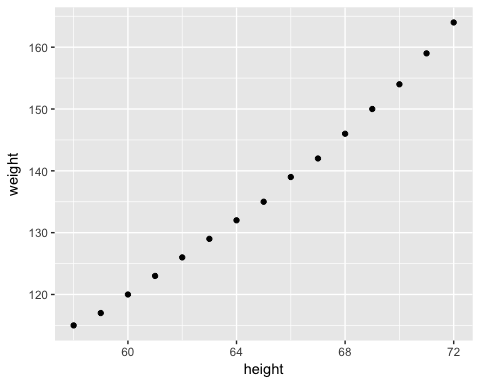 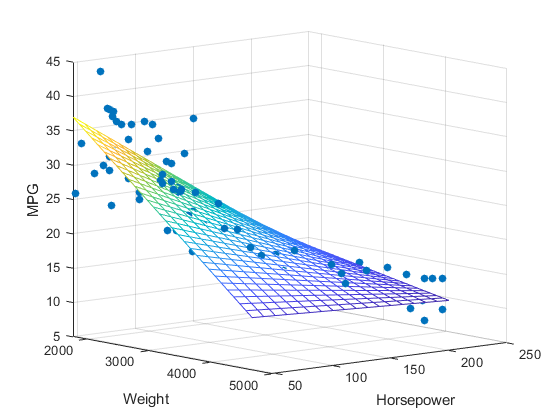

We can also add more than 2 variables (but we can't represent this on a graph as you cannot go beyond 3 dimensions!). But the principle is the same. In practical terms what we say is we are "adjusting" or "controlling" for the other variables. In other words, any effects we observe in our model we can say occur "independently" of the other variables. If we had observed a significant effect of tobacco retailers after adjusting for deprivation we would conclude that tobacco retailers are associated with smoking irrespective of the level of deprivation in an area. 

Let's look at research question 3:

3. Is the level of different domains of deprivation in datazones associated with the number of tobacco retailers?

To answer let's put all of the different parts of the SIMD into our model (i.e. the income_rank, health_rank, employment_rank, education_rank, access_rank, crime_rank and housing_rank variables)

In [ ]:
#Look at predicting retailers
multiple_linear_regression <- lm(retailers_adj ~ income_rank + 
                                 health_rank + 
                                 employment_rank + 
                                 education_rank + 
                                 access_rank + 
                                 crime_rank + 
                                 housing_rank, 
                                 data = urban_only, na.action = na.exclude)

summary(multiple_linear_regression)
confint(multiple_linear_regression)

Since this is a multiple regression, we can interpret each of the effects as being <b><i>independent</i></b> of all of the other effects in the model.

## Independent analysis exercises<a class="anchor" id="section4"></a>

Take a look at some of the remaining variables. What might be some other research questions you might explore? To get you started, look at the two health variables we haven't looked at yet; `alcohol_admissions` and `drug_admissions`. For the remainder of the class, have a think about any easy research questions you might examine looking at either of these as a dependent variable. And then:

1. Think about how you might need to recode these variables and then have a go at carrying this out
2. Produce relevant descriptive statistics that might start to address your research question
3. Run an appropriate regression model
4. Have a think about what other aditional variables you might need to include, in addition to your independent variable of interest and add these to your model.
5. Have a think about how you might interpret the analysis, perhaps write a few words of interpretation in a markdown cell below the results.

[Back to contents](#section1)

### 5. Some tips on good Coding Practice<a class="anchor" id="section5"></a>

Now is a good point to mention good coding practice. Use a Style Guide (e.g. https://style.tidyverse.org/) to format your code. As they say: Good coding style is like correct punctuation: you can manage without it, butitsuremakesthingseasiertoread. Nice code helps you work faster and helps you avoid mistakes when you're updating your code. Be consistent in:
- Spacing (to make readable)
- Indenting (to show hierarchies in code)
- Line length (under 80 characters)
- Commenting appropriately

Make lots of comments - record all the steps you used when processing the data. When you come back to your code in a couple of weeks or months, you may not remember what you were doing, you need to make sure you have enough comments to remind yourself and pick up where you left off. In Notable, you can do this by inserting a new Markdown cell, but in an RStudio script you will need to comment using the `#` as we have done in the Code cells above.

"Your closest collaborator is you six months ago and they don’t reply to email" - Paul Wilson


[Back to contents](#section1)

In [ ]:
write_csv(analysis_data, "analysis_data.csv")